### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import time



### 2. Create paths to folders

In [2]:
# Create path to Prepared data folder
path_prepared = r'C:\Users\danie\Desktop\career Foundry\31-03-2023 Instacart Basket Analysis\02 Data\Prepared data'

In [3]:
# Create path to 'Visualizations' folder
path_visualizations = r'C:\Users\danie\Desktop\career Foundry\31-03-2023 Instacart Basket Analysis\04 Analysis\Visualizations'

In [4]:
# Create path to Original data folder
path_original = r'C:\Users\danie\Desktop\career Foundry\31-03-2023 Instacart Basket Analysis\02 Data\Original data'

### 3. Import Instacart Data Set

In [5]:
# Import 'df_instacart_data_set.pkl' file
df_final = pd.read_pickle(os.path.join(path_prepared, 'instacart_data_set.pkl'))

In [6]:
df_final.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,first_name,surname,gender,state,age,date_joined,number_of_kids,family_status,income
0,2539329,1,1,Monday,8,0.0,196,1,0,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,Tuesday,7,15.0,196,1,1,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,Tuesday,12,21.0,196,1,1,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,Wednesday,7,29.0,196,1,1,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,Wednesday,15,28.0,196,1,1,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


### Create a bar chart

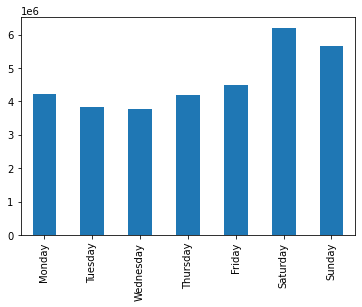

In [25]:
# Create a bar chart 'orders_day_of_the_week'

x = df_final['orders_day_of_the_week'].value_counts().loc[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']].plot.bar(x.index, x.values)

In [26]:
x.figure.savefig(os.path.join(path_visualizations, '4_9_bar_orders_day.png'))

### 3. Create a Histogram

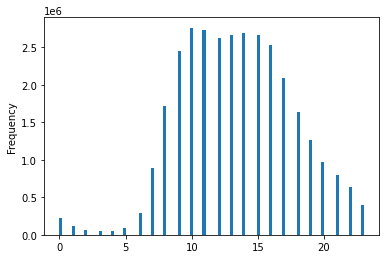

In [8]:
#Create a histogram with 'order_hour_of_day' using '.plot.hist()' function
hist = df_final['order_hour_of_day'].plot.hist(bins = 100)

***The histogram shows that most of the orders had been made between 8 am and 6 pm, and few orders between 11 pm and 6 am.***

### 4. Bar Chart 'loyalty_flag'

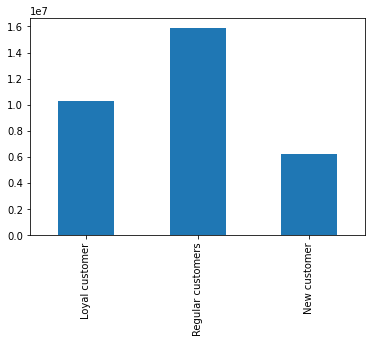

In [9]:
#Create bar chart with 'loyalty_flag' column
bar = df_final['loyalty_flag'].value_counts().loc[['Loyal customer', 'Regular customers', 'New customer']].plot.bar()

### 5. Line Chart

#### Sampling Data

In [10]:
#Sampling Data 70%, 30%, seed 4, and using np.random.rand() function
np.random.seed(4)
dev = np.random.rand(len(df_final)) <= 0.7

In [11]:
dev

array([False,  True, False, ..., False,  True,  True])

In [12]:
#Define saples data frames
big = df_final[dev]
small = df_final[~dev]

In [13]:
#Check data samples integrity
len(df_final)

32399732

In [14]:
len(big) + len(small)

32399732

In [15]:
#Define a dataframe using 'small' sample (30% of the entire Data) as df_2
df_2 = small[['order_hour_of_day','prices']]

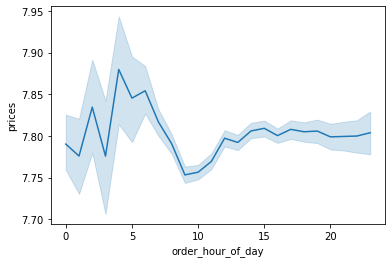

In [16]:
#Create line chart using df_2 data frame with the columns of interest
start_time2 = time.time()

line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

In [17]:
print(time.time() - start_time2, ' seconds')

97.08540534973145  seconds


***The line chart demostrate that customers who does their purshase between 4 am and 6 am tend to buy more expensive items***

***Customers customers who made the orders between 8 am and 11 am tend to buy cheaper items.***

***The prices bougth between 12 pm and 1 am keeps a fairly stable average price per item ordered of 7.80 aprox.***

In [18]:
#Create data frame sample with 'age' and 'number_of_kids' column 
df_2 = small[['age','number_of_kids']]

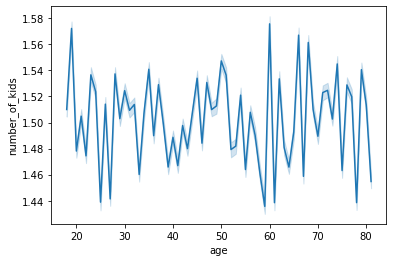

In [19]:
#Create line chart line chart to study correlation between 'age' and 'number_of_kids' using sns.lineplot()
line2 = sns.lineplot(data = df_2, x = 'age',y = 'number_of_kids')

***There is not direct correlation between Customers' age and the number of dependents***

### 7. Scatterplot 'age' & 'income'

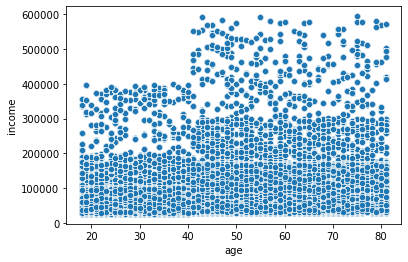

In [20]:
scatter = sns.scatterplot(x = 'age',y = 'income', data = df_final)

***There is a significan difference of spending power between population 40 years old or younger, and the population 41+ years old.***

### 8. Export the visualizations

hist.figure.savefig(os.path.join(path_visualizations, '4_9_hist_orders_hours.png'))

line.figure.savefig(os.path.join(path_visualizations, '4_9_line_prices_hours.png'))

bar.figure.savefig(os.path.join(path_visualizations, '4_9_bar_loyalty_flag.png'))

line2.figure.savefig(os.path.join(path_visualizations, '4_9_line_age_n_of_dependent.png'))

scatter.figure.savefig(os.path.join(path_visualizations, '4_9_scatter_age_income.png'))

print(time.time() - start_time_task, ' seconds')